In [130]:
import numpy as np
import numdifftools as nd
import inspect
from scipy.optimize import minimize_scalar
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [7]:
f1 = lambda v: np.sum([(v[0] - v[1]) ** 4, 2 * v[0] * v[1], v[1] * v[1], -v[0], 2 * v[1]])
rosenbrock = lambda v: np.sum([(1 - v[1]) ** 2, 100 * (v[0] - v[1] * v[1]) ** 2])

In [67]:
def gradient_descent(f, start, max_steps=2000, epsilon=.000001):
    point = start
    grad = nd.Gradient(f)
    steps = 0
    result = 100
    d = -grad(point)
    point_list = [point.flatten().tolist()]
    while steps < max_steps and result > epsilon:
        steps += 1
        phi = lambda x: f((point + x * d).flatten())
        res = minimize_scalar(phi, method='brent')
        point += res.x * d
        point_list.append(point.flatten().tolist())
        d = -grad(point)
        result = np.linalg.norm(d)
    print "Step: {0}, Gradient Val: {1}, Point: {2}".format(steps, result, point)
    return point_list

In [63]:
p1 = gradient_descent(f1, np.random.rand(1, 2))

Step: 25, Gradient Val: 7.48912261029e-07, Point: [[ 0.34878029 -0.42438996]]


In [68]:
p2 = gradient_descent(rosenbrock, np.random.rand(1, 2))


Step: 2000, Gradient Val: 0.0302313674427, Point: [[ 0.96596473  0.98290013]]


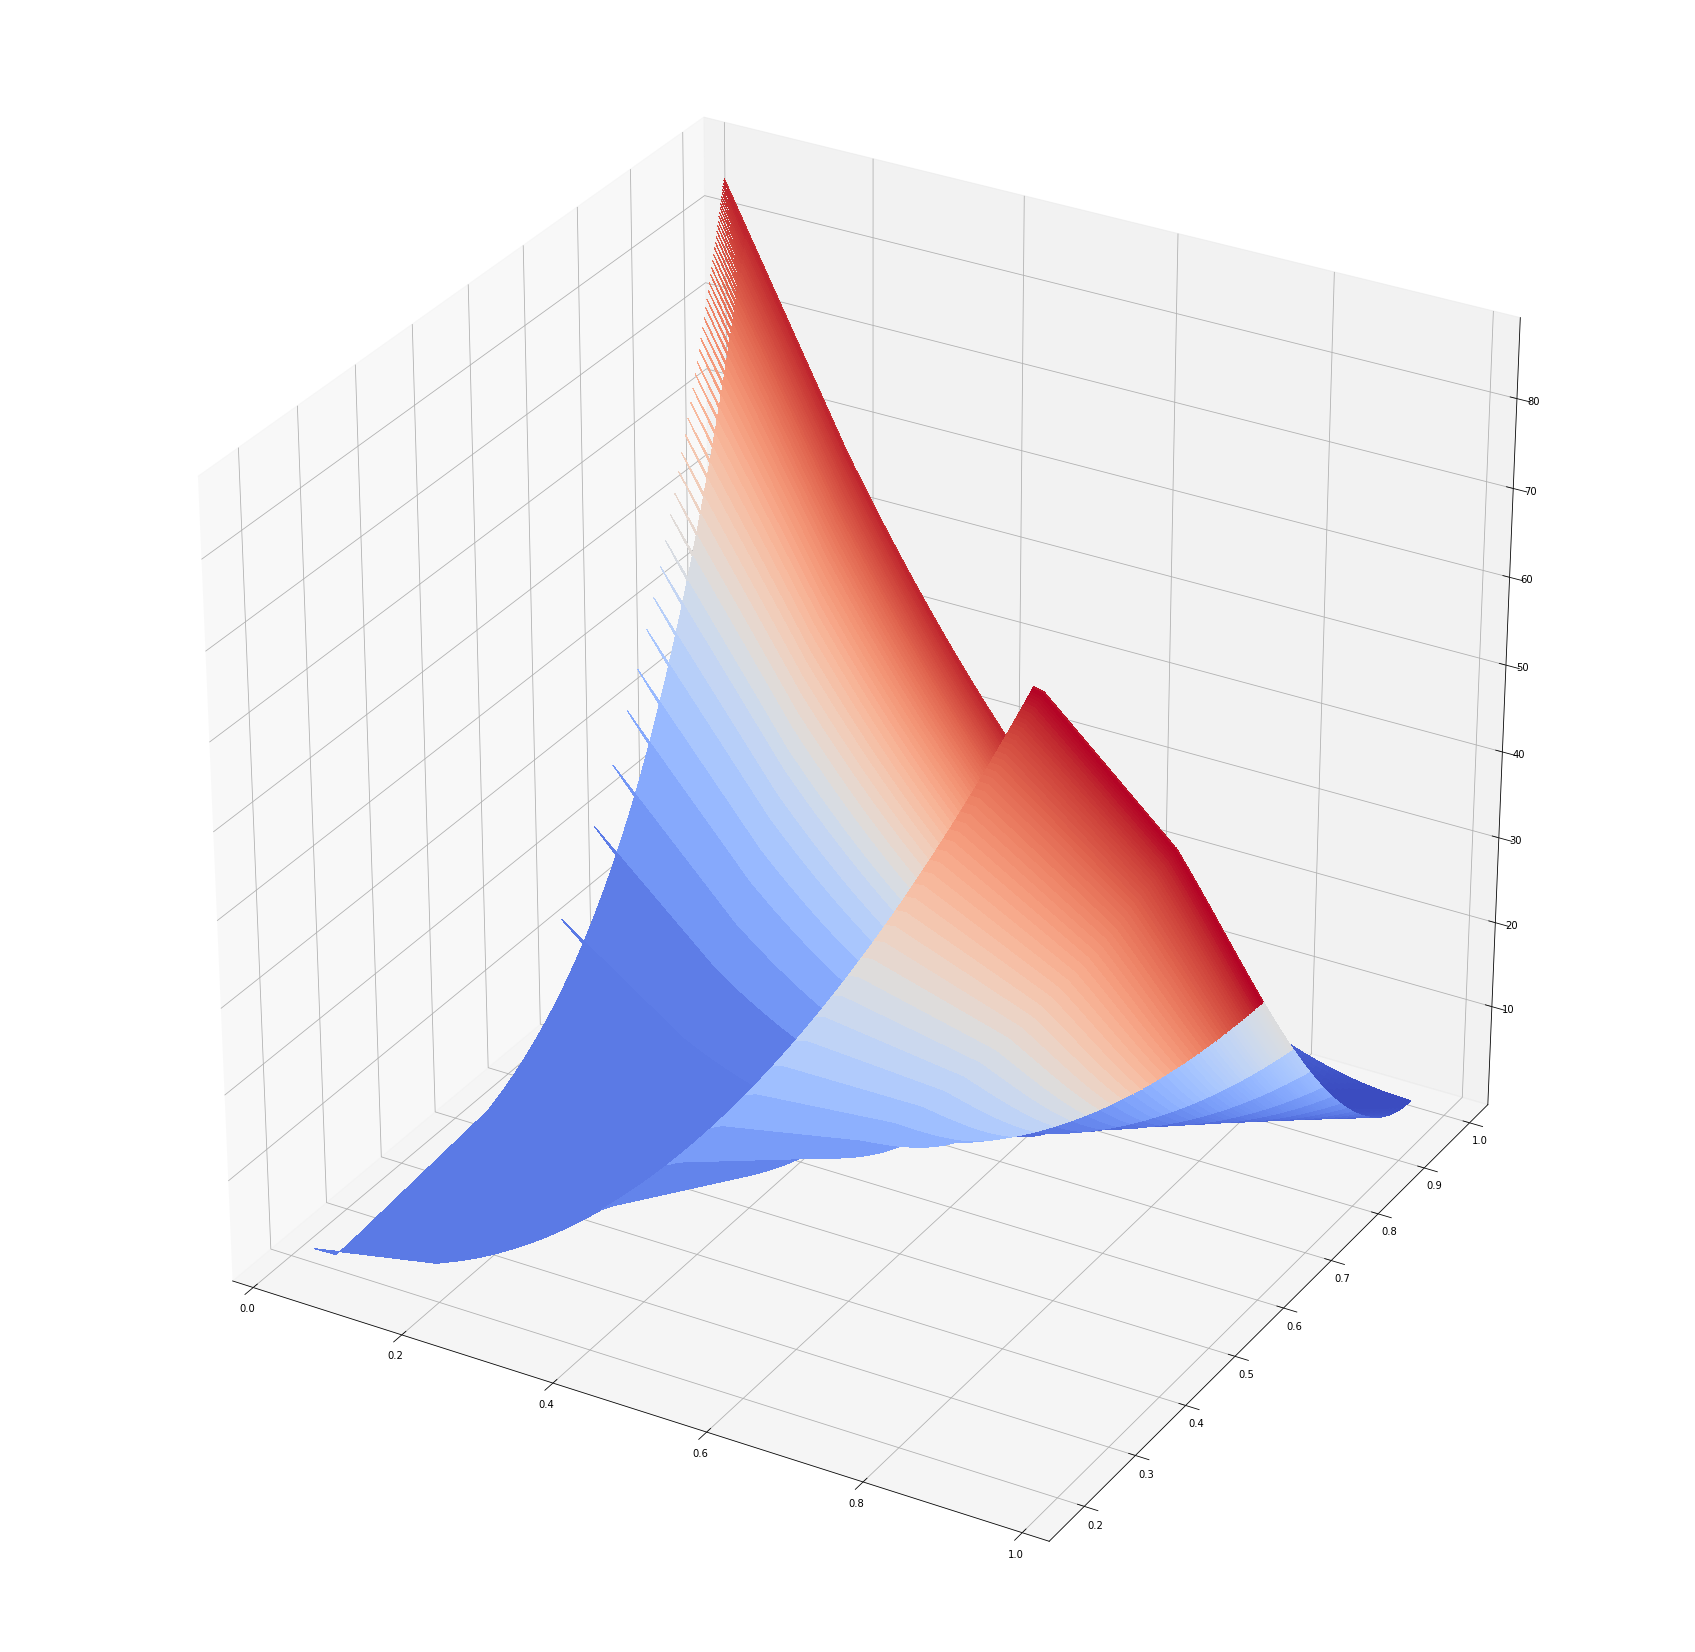

In [127]:

fig = plt.figure(figsize=(30, 30))
ax = fig.gca(projection='3d')

mat = np.matrix(p2)
X, Y = np.array(mat[:, 0]), np.array(mat[:, 1])
#my_func = np.vectorize(lambda x, y: rosenbrock([x, y]))
#Z = my_func(X, Y)

#for i in range(1, len(X)):
#    ax.plot([X[i-1], X[i]], [Y[i-1], Y[i]], zs=[Z[i-1], Z[i]])
    
mX = np.arange(-2, 2, 0.25)
mY = np.arange(-2, 2, 0.25)
mX, mY = np.meshgrid(X, Y)
mZ = my_func(mX, mY)
surf = ax.plot_surface(mX, mY, mZ, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()